In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import pandas_profiling   


In [2]:
beer=pd.read_csv("C:/Users/gaura/OneDrive/Desktop/Data Science/Python Class/Class 20-21 Files/Segmentation/3. Segmentation - Beer Example/Beer.txt", sep=" ")

In [3]:
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


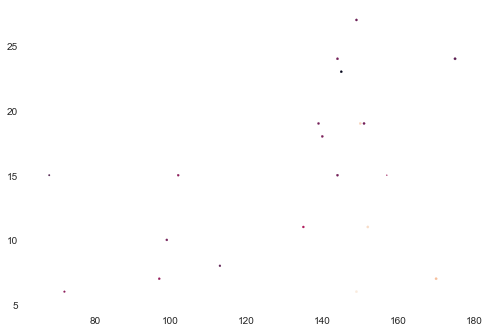

In [142]:
plt.scatter(beer["calories"],beer["sodium"],beer["alcohol"],beer["cost"])

In [5]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   calories  20 non-null     int64  
 2   sodium    20 non-null     int64  
 3   alcohol   20 non-null     float64
 4   cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [6]:
beer.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.550000,14.950000,4.240000,0.494500
std,30.283702,6.581273,1.087924,0.144858
min,68.000000,6.000000,0.900000,0.280000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [7]:
beer_num=beer[["calories","sodium","alcohol", "cost"  ]]

In [8]:
beer_num.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [9]:
beer_cat=beer[["name"]]

In [10]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=beer_num.apply(var_summary)

In [11]:
num_summary

,calories,sodium,alcohol,cost
N,20.000000,20.000000,20.000000,20.000000
NMISS,0.000000,0.000000,0.000000,0.000000
SUM,2651.000000,299.000000,84.800000,9.890000
MEAN,132.550000,14.950000,4.240000,0.494500
MEDIAN,144.000000,15.000000,4.600000,0.435000
STD,30.283702,6.581273,1.087924,0.144858
VAR,917.102632,43.313158,1.183579,0.020984
MIN,68.000000,6.000000,0.900000,0.280000
P1,68.760000,6.000000,1.166000,0.299000
P5,71.800000,6.000000,2.230000,0.375000


In [12]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

beer_num=beer_num.apply(lambda x: Missing_imputation(x))

#### Standardrizing data

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

beer_scaled=sc.fit_transform(beer_num)

In [17]:
beer_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [18]:
pd.DataFrame(beer_scaled).describe()

,0,1,2,3
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-3.219647e-16,7.771561e-17,-1.003711e-15,-3.608225e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.186883e+00,-1.395248e+00,-3.149822e+00,-1.519224e+00
25%,-7.554993e-01,-8.496201e-01,-6.129894e-02,-4.745363e-01
50%,3.879133e-01,7.794680e-03,3.395018e-01,-4.214165e-01
75%,5.996564e-01,6.313691e-01,6.224200e-01,-6.728499e-02
max,1.438159e+00,1.878518e+00,1.188256e+00,2.092917e+00


#### Applyting PCA

In [19]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

we dont know , how much components we take, so on starting we have to take no. of components as no of variable.

In [20]:
pc = PCA(n_components=4)
pc.fit(beer_scaled)

PCA(n_components=4)

In [21]:
pc.explained_variance_  #Eigen value

array([1.89181613, 1.51026991, 0.58312351, 0.22531677])

In [22]:
#Eigen values
sum(pc.explained_variance_)

4.210526315789474

In [23]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_
var

array([0.44930633, 0.3586891 , 0.13849183, 0.05351273])

This shows that first principal component explains 44.93% variance. Second component explains 35.86% variance. Third component explains 13.84% variance and Fourth component explains 5.35% variance.

In [24]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 44.93,  80.8 ,  94.65, 100.  ])

Text(0, 0.5, 'Proportion of Variance Explained')

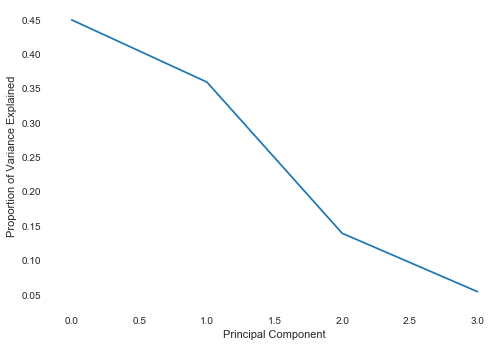

In [75]:
#scree plot
plt.plot(var)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")

Text(0, 0.5, 'Proportion of Variance Explained')

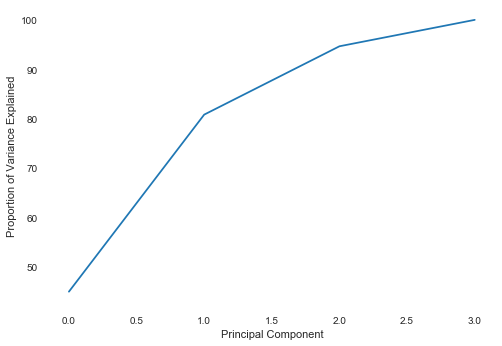

In [80]:
plt.plot(var1)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")

#### above plot shows that 2 components results in variance close to ~ 98%. Therefore, in this case, we’ll select number of components as 2 [PC1 & PC2] and proceed to the modeling stage.

In [25]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,5))

,Eigen_value,Cumm_variance
1,1.891816,44.93
2,1.510270,80.80
3,0.583124,94.65
4,0.225317,100.00


In [143]:
pc_final=PCA(n_components=2).fit(beer_scaled2)

In [144]:
pc_final.explained_variance_

array([1.3255709 , 0.77969226])

In [145]:
reduced_cr=pc_final.fit_transform(beer_scaled)  # the out put is Factors (F1, F2, ...F9)

In [146]:
dimensions = pd.DataFrame(reduced_cr)

In [147]:
dimensions.columns = ["C1", "C2"]

In [148]:
dimensions.head()

,C1,C2
0,-0.396016,-0.299267
1,-0.894328,-0.705181
2,1.347124,-0.358457
3,-1.371596,2.139739
4,-1.159292,1.905508


In [83]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=beer_num.columns).T
#preferred way using factor analysis
Loadings.to_csv("Loadings.csv")

#### Clustering

In [149]:
#selected the list variables from PCA based on factor loading matrics
list_var = ["alcohol","cost"]

In [169]:
beer_scaled1=pd.DataFrame(beer_scaled, columns=beer_num.columns)
beer_scaled1.head(5)

beer_scaled2=beer_scaled1[list_var]
beer_scaled2.head()

,alcohol,cost
0,0.433808,-0.456830
1,0.622420,-0.456830
2,-3.149822,-0.102698
3,0.905338,1.667960
4,0.716726,1.951265


### Segmentation

### Finding Optimal number of clusters

### Elbow Analysis

In [151]:
km_3=KMeans(n_clusters=3,random_state=123)

In [152]:
km_3.fit(beer_scaled2)

KMeans(n_clusters=3, random_state=123)

In [153]:
km_3.labels_

array([1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1])

In [154]:
km_3.cluster_centers_

array([[ 0.69314951,  1.89814505],
       [ 0.26695868, -0.49496693],
       [-2.0810203 , -0.38600338]])

In [155]:
from sklearn import metrics
metrics.silhouette_score(beer_scaled2,km_3.labels_)

0.6779695988546803

In [156]:
k_range = range(1, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123, init="k-means++")
    km.fit(beer_scaled2)
    scores.append(km.inertia_)
scores    

[40.0,
 19.582945585794093,
 6.11605463067605,
 4.282155386520534,
 2.5883700612443596,
 1.6231526054422543,
 1.1796837803665303,
 0.8413742803255996,
 0.5023339742048603]

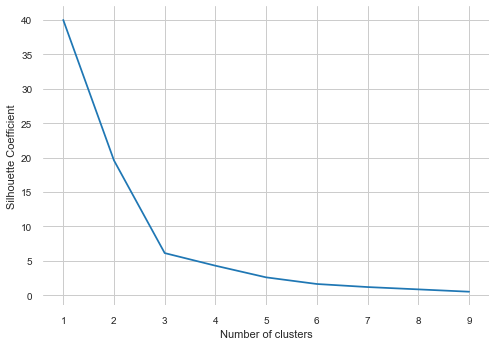

In [157]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [165]:
km = KMeans(n_clusters=3, random_state=123, init="k-means++")
y_pred=km.fit_predict(beer_scaled2)
y_pred

array([1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1])

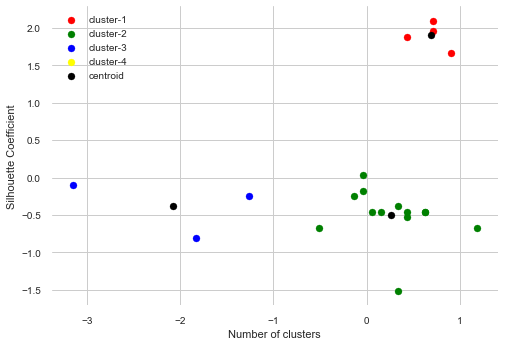

In [166]:
import matplotlib.pyplot as mtp 
x=beer_scaled2.values
mtp.scatter(x[y_pred == 0,0],x[y_pred == 0,1], c='red',label='cluster-1')
mtp.scatter(x[y_pred == 1,0],x[y_pred == 1,1], c='green',label='cluster-2')
mtp.scatter(x[y_pred == 2,0],x[y_pred == 2,1], c='blue',label='cluster-3')
mtp.scatter(x[y_pred == 3,0],x[y_pred == 3,1], c='yellow',label='cluster-4')
mtp.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], label='centroid', c='black')
mtp.xlabel('Number of clusters')
mtp.ylabel('Silhouette Coefficient')
mtp.grid(True)
mtp.legend()  
mtp.show()  